In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


# EDA

In [2]:
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Info shows there are no missing values. going to examine data furthermore

In [4]:
df.iloc[0:1, :].isna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the features having the float values except quality 

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The above function provides --> wine quality with 5 & 6 are more in number all over the data.

# Visualization

<AxesSubplot:xlabel='quality', ylabel='count'>

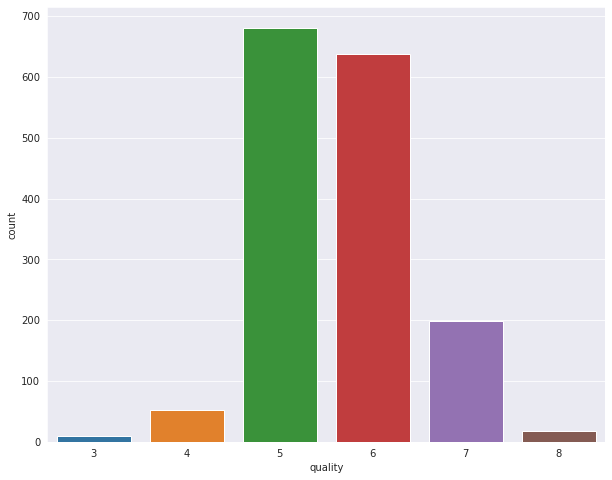

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize= (10,8))
sns.set_style('darkgrid')

sns.countplot(x = 'quality', data = df)

<AxesSubplot:xlabel='quality'>

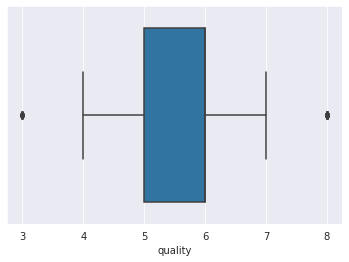

In [8]:
sns.boxplot(x = 'quality', data = df)

from this graph assuming the quality above 6 is considered as 'good' and below 6 as 'bad'.

In [9]:
df['quality'] = ['good' if i>6 else 'bad' for i in df['quality']]

In [10]:
print(df['quality'].head(3))

0    bad
1    bad
2    bad
Name: quality, dtype: object


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


Now observe the dtype of quality has changed to 'object' which means category

In [12]:
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()

df['quality'] = le.fit_transform(df['quality'])

In [14]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


The categorical values converted to numericals

In quality feature 0 means bad
                   1 means good

# Test Train Split

first we have to standardize the features in X

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('quality', axis = 1)
y = df['quality']

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Function to evaluate the models

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [18]:
def evaluation(X_train, X_test, y_train, y_test, model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    cm  = confusion_matrix(y_test, y_pred)
    print(" Accuracy of the model: " , accuracy * 100)
    print(" Confusion Matrix: \n" , cm)
    

In [19]:
# logistic regression
print("LOGISTIC REGRESSION:")
lr = LogisticRegression()
evaluation(X_train, X_test, y_train, y_test, lr)

#Decision Tree
print("\nDECISION TREE:")
dt = DecisionTreeClassifier()
evaluation(X_train, X_test, y_train, y_test, dt)

#SVM
print("\nSUPPORT VECTOR MACHINE:")
sm = SVC()
evaluation(X_train, X_test, y_train, y_test, sm)

#Random Forest
print("\nRANDOM FOREST:")
rf = RandomForestClassifier()
evaluation(X_train, X_test, y_train, y_test, rf)

LOGISTIC REGRESSION:
 Accuracy of the model:  87.70833333333333
 Confusion Matrix: 
 [[405  20]
 [ 39  16]]

DECISION TREE:
 Accuracy of the model:  87.29166666666667
 Confusion Matrix: 
 [[392  33]
 [ 28  27]]

SUPPORT VECTOR MACHINE:
 Accuracy of the model:  89.375
 Confusion Matrix: 
 [[412  13]
 [ 38  17]]

RANDOM FOREST:
 Accuracy of the model:  91.25
 Confusion Matrix: 
 [[410  15]
 [ 27  28]]


# Conclusion

After comparing the four models, the model with Random Forest Classifier gives the better accuracy with 91 percent.